### **Preparing Dataset :)**

In [84]:
import pandas as pd
import numpy as np

df = pd.read_csv("datasets_time_series_covid_19_confirmed.csv") # Reading dataset
print(df.keys())
print(df.shape)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       ...
       '5/18/2020', '5/19/2020', '5/20/2020', '5/21/2020', '5/22/2020',
       '5/23/2020', '5/24/2020', '5/25/2020', '5/26/2020', '5/27/2020'],
      dtype='object', length=131)
(266, 131)


In [85]:
df.drop(inplace = True, columns = ['Province/State','Lat','Long']) # Dropping extra columns
print("shape after drop", df.shape)

df.dropna(inplace= True, axis = 0) # Dropping missing values
print("shape after dropna", df.shape)

shape after drop (266, 128)
shape after dropna (266, 128)


In [86]:
df["Country/Region"].nunique() #Finding Unique Countries in the dataset

188

In [87]:
grouped = df.groupby('Country/Region') #Grouping data based on countries
new_df = grouped.sum() #summing rows for each group
new_df

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,...,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,313,319,329,329,335,336,340,342,342,342,343,344,344,353,353,353,362,371,374,375,375,375,375,375,375,375,375,375,376,381,388,391,398,423,423,423,423,423,429,434
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,9,9,9,9
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197,209,212,222,233,249,256


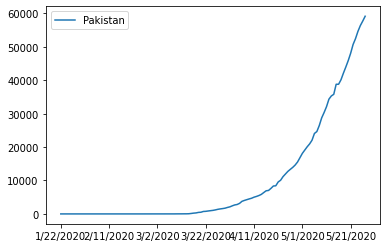

In [88]:
new_df.loc['Pakistan'].plot(legend = True) # Obtaining Pakistan's trend

### **Trend Comparison :)**
>  -Using Cumulative cases approach

In [89]:
cor = new_df.T.corr()
cor

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.000000,0.823104,0.941343,0.665803,0.934209,0.673239,0.976714,0.987806,0.637402,0.654487,0.947948,0.808833,0.981587,0.998092,0.705436,0.971872,0.787539,0.685429,0.784143,0.961842,0.999618,0.845839,0.839828,0.998610,0.545807,0.896884,0.776682,0.848318,0.964007,0.968839,0.555678,0.974380,0.890339,0.975059,0.989202,0.997734,0.295153,0.988759,0.872638,0.954117,...,0.983391,0.832757,0.554156,0.996106,0.939692,0.760263,0.663073,0.970442,0.996786,0.942746,0.713110,0.936310,0.992476,0.590389,0.892880,0.663117,0.901202,0.619752,0.963796,0.844746,0.660982,0.752030,0.977837,0.591453,0.717432,0.840425,0.878249,0.940476,0.942643,0.965727,0.876868,0.753436,0.882036,0.969609,0.673825,0.744547,0.741682,0.965900,0.977536,0.891466
Albania,0.823104,1.000000,0.961972,0.961200,0.965481,0.963164,0.922478,0.899144,0.939564,0.948153,0.956781,0.995917,0.907787,0.825365,0.971104,0.899546,0.996429,0.958212,0.806499,0.867066,0.814215,0.996227,0.981495,0.842523,0.859274,0.983871,0.993348,0.977072,0.840309,0.888421,0.873306,0.924216,0.984044,0.704092,0.783784,0.850831,0.477051,0.895357,0.551317,0.939847,...,0.882889,0.987991,0.874920,0.806674,0.932792,0.991942,0.957429,0.879748,0.861801,0.637451,0.979147,0.953320,0.755047,0.886540,0.987830,0.957276,0.941260,0.927645,0.660896,0.944637,0.957311,0.946275,0.895222,0.910758,0.982437,0.989166,0.990052,0.911877,0.942556,0.930085,0.987422,0.984538,0.981067,0.881272,0.939683,0.984088,0.948726,0.671066,0.759268,0.919076
Algeria,0.941343,0.961972,1.000000,0.858895,0.993965,0.866592,0.985773,0.977969,0.829158,0.842355,0.996165,0.957243,0.985661,0.944895,0.883976,0.982630,0.945180,0.874206,0.858403,0.943467,0.935843,0.975173,0.958394,0.954113,0.730461,0.992195,0.934693,0.968643,0.932731,0.976750,0.744574,0.987874,0.990919,0.853482,0.920053,0.954101,0.398394,0.980862,0.704706,0.992915,...,0.975803,0.966944,0.745566,0.934631,0.988174,0.929039,0.853211,0.972609,0.961903,0.793642,0.893759,0.991855,0.899264,0.768047,0.991651,0.853440,0.952792,0.811630,0.823896,0.955048,0.853277,0.906368,0.972758,0.787811,0.899992,0.970815,0.987146,0.966133,0.994164,0.993970,0.986823,0.914329,0.983964,0.948311,0.843646,0.910948,0.889850,0.832783,0.895344,0.937787
Andorra,0.665803,0.961200,0.858895,1.000000,0.879127,0.994148,0.806203,0.772682,0.994445,0.995605,0.859554,0.953437,0.774888,0.660123,0.997180,0.751366,0.969699,0.969235,0.692211,0.755953,0.654235,0.942157,0.929113,0.686829,0.934192,0.900099,0.983678,0.897427,0.703868,0.737877,0.951787,0.804340,0.900254,0.536121,0.614831,0.707762,0.517198,0.758689,0.398988,0.820545,...,0.736323,0.923369,0.951271,0.637637,0.799336,0.971000,0.995368,0.722113,0.718593,0.472391,0.996795,0.839508,0.581753,0.958539,0.909723,0.997783,0.873196,0.984708,0.488482,0.836001,0.999115,0.885492,0.776952,0.981380,0.993504,0.925106,0.917999,0.810326,0.817567,0.801373,0.910850,0.988172,0.900668,0.772593,0.982120,0.989708,0.944060,0.498823,0.599707,0.837005
Angola,0.934209,0.965481,0.993965,0.879127,1.000000,0.885403,0.985432,0.976201,0.854075,0.865411,0.995158,0.957863,0.976048,0.932829,0.903416,0.965763,0.949633,0.885572,0.838

In [90]:
pak_row = cor.iloc[130,:] #Pakistan's index is 130
print(type (pak_row))
#print(pak_row)
pak_row.sort_values(ascending= False, inplace = True)
pak_row.head(10)

<class 'pandas.core.series.Series'>


Country/Region
Pakistan        1.000000
Saudi Arabia    0.998967
Qatar           0.998740
Colombia        0.998703
Peru            0.998608
Egypt           0.998586
Mexico          0.998245
Senegal         0.998025
Bahrain         0.997894
Russia          0.996881
Name: Pakistan, dtype: float64

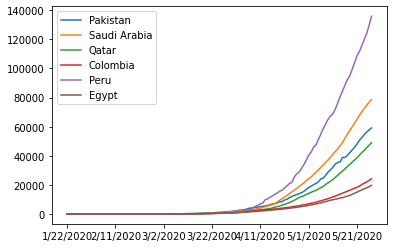

In [91]:
new_df.loc['Pakistan'].plot(legend = True)
new_df.loc["Saudi Arabia"].plot(legend = True)
new_df.loc["Qatar"].plot(legend = True)
new_df.loc["Colombia"].plot(legend = True)
new_df.loc["Peru"].plot(legend = True)
new_df.loc["Egypt"].plot(legend = True)

### **Trend Comparison :)**
>  -Using Cases per day approach



In [92]:
cases = new_df.iloc[:,1:] #Modifying df wrt reported cases on each day instead of cumulative approach
cases = cases.diff().fillna(0).astype(np.int64)
cases

,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,2/1/2020,2/2/2020,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/8/2020,2/9/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,2/14/2020,2/15/2020,2/16/2020,2/17/2020,2/18/2020,2/19/2020,2/20/2020,2/21/2020,2/22/2020,2/23/2020,2/24/2020,2/25/2020,2/26/2020,2/27/2020,2/28/2020,2/29/2020,3/1/2020,3/2/2020,...,4/18/2020,4/19/2020,4/20/2020,4/21/2020,4/22/2020,4/23/2020,4/24/2020,4/25/2020,4/26/2020,4/27/2020,4/28/2020,4/29/2020,4/30/2020,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020,5/11/2020,5/12/2020,5/13/2020,5/14/2020,5/15/2020,5/16/2020,5/17/2020,5/18/2020,5/19/2020,5/20/2020,5/21/2020,5/22/2020,5/23/2020,5/24/2020,5/25/2020,5/26/2020,5/27/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,...,-385,-434,-442,-483,-542,-616,-673,-751,-805,-967,-1078,-1173,-1398,-1553,-1680,-1909,-2091,-2404,-2560,-2721,-2928,-3177,-3534,-3815,-4087,-4346,-4741,-5137,-5469,-5718,-6124,-6704,-7181,-7707,-8235,-9009,-9584,-10169,-10802,-11406
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,...,1986,2067,2134,2202,2276,2344,2449,2544,2656,2781,2899,3082,3233,3372,3506,3679,3845,4018,4165,4340,4519,4702,4855,5019,5191,5373,5544,5713,5888,6073,6253,6428,6578,6759,6937,7124,7308,7499,7668,7807
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-2,...,-1830,-1916,-2001,-2094,-2187,-2284,-2396,-2518,-2644,-2774,-2906,-3105,-3261,-3409,-3548,-3726,-3898,-4087,-4246,-4430,-4617,-4804,-4968,-5136,-5309,-5493,-5681,-5868,-6060,-6258,-6440,-6616,-6780,-6966,-7156,-7351,-7544,-7740,-7934,-8094
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,...,-680,-689,-693,-693,-698,-698,-706,-713,-712,-716,-716,-716,-718,-715,-712,-713,-715,-715,-715,-716,-709,-711,-710,-710,-713,-715,-713,-713,-713,-713,-711,-709,-710,-704,-702,-701,-693,-693,-693,-692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,-2,-2,-2,-2,-2,-2,-2,-2,-2,-6,-6,-8,-8,-8,-10,-10,-13,-13,-14,-15,-15,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,-16,...,45,51,61,61,67,68,70,72,72,72,73,74,74,83,83,82,91,100,103,87,87,87,87,87,87,87,63,61,58,61,64,67,74,99,99,98,98,97,102,107
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-307,-313,-323,-323,-329,-330,-334,-336,-336,-336,-337,-338,-338,-347,-347,-347,-356,-365,-368,-369,-369,-369,-369,-369,-369,-369,-369,-369,-370,-375,-382,-385,-392,-417,-417,-417,-414,-414,-420,-425
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5,0,0,1,4,4,6,16,19,19,28,28,45,50,59,64,79,100,116,122,124,161,178,191,203,206,213,224,240,247


In [93]:
new_corr = cases.T.corr()
new_corr

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,1.000000,-0.926836,0.934351,0.579400,0.986639,-0.956861,0.930457,-0.008772,-0.605669,0.502356,0.922856,-0.965466,-0.997317,0.994351,-0.954460,-0.421453,0.734076,-0.747763,0.729416,-0.997520,0.922043,0.799198,-0.992269,0.992310,-0.872823,0.908701,0.684070,0.756054,-0.945051,0.894436,-0.959980,-0.844418,0.849207,-0.664104,-0.989905,0.481573,0.014789,0.973318,-0.896754,...,0.975498,-0.711371,0.785964,-0.995121,-0.910809,0.920408,0.347131,-0.265760,-0.988152,0.985961,-0.652163,0.651954,-0.957973,0.997975,-0.853246,0.301644,0.599766,-0.489028,-0.918637,0.903138,-0.539502,0.596571,-0.967768,0.952377,-0.670997,-0.795000,-0.840859,0.836425,-0.914770,-0.982482,-0.820808,0.835562,-0.867398,0.773299,0.960314,-0.691626,0.687264,-0.973619,-0.973213,0.975993
Algeria,NaN,-0.926836,1.000000,-0.999445,-0.819122,-0.911539,0.988806,-0.988418,0.335185,0.828626,-0.750765,-0.995424,0.990373,0.936280,-0.956723,0.988778,0.712080,-0.929890,0.835544,-0.838136,0.948686,-0.710831,-0.964690,0.965350,-0.965259,0.990957,-0.990747,-0.888928,-0.936390,0.981348,-0.800910,0.989113,0.982828,-0.984385,0.780824,0.964062,-0.346726,-0.139903,-0.987914,0.990762,...,-0.982723,0.916522,-0.956507,0.942464,0.989734,-0.988403,-0.252618,-0.029745,0.968078,-0.973510,0.872420,-0.872172,0.791146,-0.914898,0.985184,-0.031315,-0.829386,0.735969,0.707976,-0.693312,0.778300,-0.828244,0.965059,-0.814665,0.890001,0.961067,0.981197,-0.979550,0.995203,0.955736,0.974178,-0.979708,0.975770,-0.947941,-0.824697,0.839859,-0.891937,0.832527,0.920591,-0.895420
Andorra,NaN,0.934351,-0.999445,1.000000,0.800933,0.921147,-0.988788,0.986744,-0.306099,-0.810856,0.729817,0.993056,-0.992598,-0.944613,0.963437,-0.993068,-0.691871,0.919590,-0.838858,0.840153,-0.954687,0.726249,0.957320,-0.970600,0.970523,-0.988509,0.992265,0.874003,0.931487,-0.986030,0.818973,-0.990428,-0.978803,0.980499,-0.783870,-0.967601,0.359486,0.127938,0.990444,-0.990194,...,0.987376,-0.908512,0.950810,-0.950302,-0.992156,0.991725,0.278132,-0.001222,-0.971413,0.976894,-0.857107,0.856836,-0.803014,0.923089,-0.980585,0.063066,0.811752,-0.715285,-0.722824,0.703750,-0.757924,0.810361,-0.965783,0.829004,-0.876442,-0.955225,-0.975980,0.974258,-0.996494,-0.958213,-0.968857,0.975064,-0.975265,0.942826,0.835282,-0.838766,0.877880,-0.842110,-0.926161,0.902435
Angola,NaN,0.579400,-0.819122,0.800933,1.000000,0.538244,-0.786592,0.824693,-0.810707,-0.995128,0.988693,0.838960,-0.751179,-0.585814,0.634719,-0.729784,-0.975356,0.963021,-0.629482,0.659938,-0.630460,0.236170,0.932242,-0.664325,0.663999,-0.865744,0.797805,0.989166,0.896173,-0.715710,0.328171,-0.767677,-0.890531,0.888227,-0.593138,-0.686842,0.013329,0.350170,0.739061,-0.827627,...,0.705574,-0.933000,0.912996,-0.596829,-0.783823,0.764858,-0.174180,0.591439,-0.695115

In [94]:
pak_row = new_corr.iloc[130,:]
print(type (pak_row))
#print(pak_row)
pak_row.sort_values(ascending= False, inplace = True)
pak_row.head(10)

<class 'pandas.core.series.Series'>


Country/Region
Pakistan        1.000000
Saudi Arabia    0.998666
Peru            0.998418
Bahrain         0.997741
Mexico          0.997370
Russia          0.996400
Belarus         0.995503
Kazakhstan      0.995016
India           0.994692
Brazil          0.992504
Name: Pakistan, dtype: float64

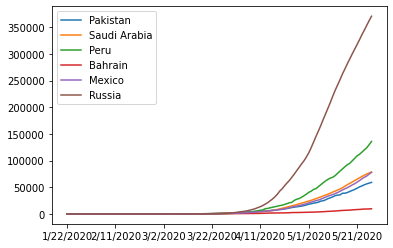

In [95]:
new_df.loc['Pakistan'].plot(legend = True)
new_df.loc["Saudi Arabia"].plot(legend = True)
new_df.loc["Peru"].plot(legend = True)
new_df.loc["Bahrain"].plot(legend = True)
new_df.loc["Mexico"].plot(legend = True)
new_df.loc["Russia"].plot(legend = True)

### **Dataset Finalisation :)**

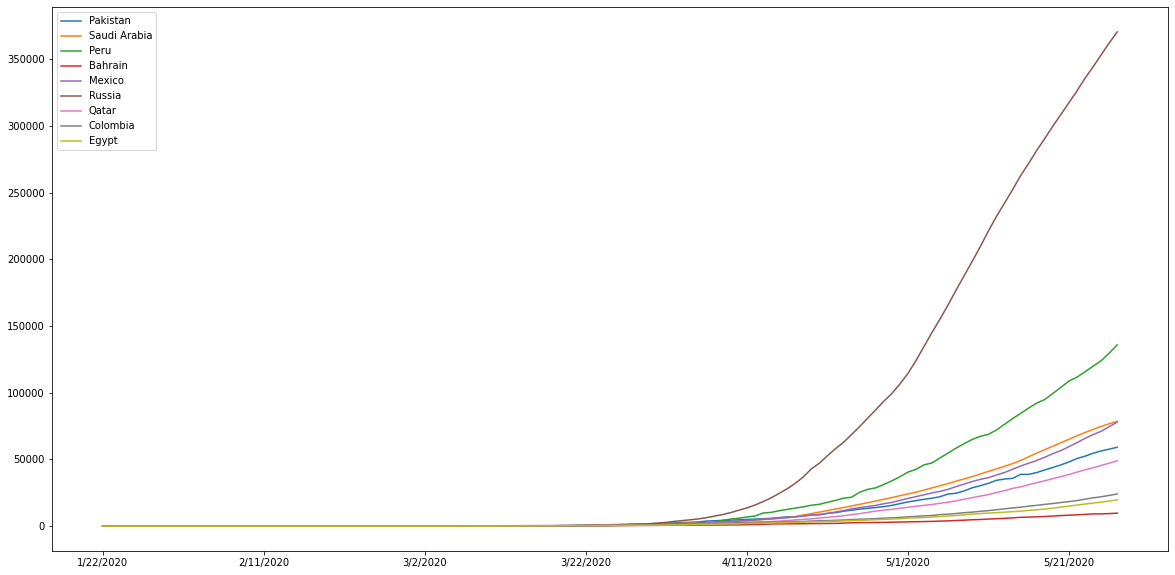

In [96]:
new_df.loc['Pakistan'].plot(figsize = (20,10), legend = True)
new_df.loc["Saudi Arabia"].plot(figsize = (20,10), legend = True)
new_df.loc["Peru"].plot(figsize = (20,10), legend = True)
new_df.loc["Bahrain"].plot(figsize = (20,10), legend = True)
new_df.loc["Mexico"].plot(figsize = (20,10), legend = True)
new_df.loc["Russia"].plot(figsize = (20,10), legend = True)
new_df.loc["Qatar"].plot(figsize = (20,10), legend = True)
new_df.loc["Colombia"].plot(figsize = (20,10), legend = True)
new_df.loc["Egypt"].plot(figsize = (20,10), legend = True)

### **Most Related Countries :)**


```
Comparing all results and analysing them using graph, the most related 5 countries come out to be 
1. Saudia Arab
2. Mexico
3. Colombia
4. Qatar
5. Peru
```



### **Data Exploration:)**

In [0]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

def visualiseData (data):
  data.index = pd.to_datetime(data.index)
  plt.plot(data, label = "Cumulative cases")
  plt.legend()
  data = data.diff().fillna(data[0]).astype(np.int64)
  plt.plot(data, label='Daily Cases')
  plt.legend()
  return data

### **Data Preprocessing :)**

In [0]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

### **Predictive Model Implementation :)**

In [0]:
class CoronaVirusPredictor(nn.Module):

  def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
    super(CoronaVirusPredictor, self).__init__()

    self.n_hidden = n_hidden
    self.seq_len = seq_len
    self.n_layers = n_layers

    self.lstm = nn.LSTM(
      input_size=n_features,
      hidden_size=n_hidden,
      num_layers=n_layers,
      dropout=0.5
    )

    self.linear = nn.Linear(in_features=n_hidden, out_features=1)

  def reset_hidden_state(self):
    self.hidden = (
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
        torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
    )

  def forward(self, sequences):
    lstm_out, self.hidden = self.lstm(
      sequences.view(len(sequences), self.seq_len, -1),
      self.hidden
    )
    last_time_step = \
      lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
    y_pred = self.linear(last_time_step)
    return y_pred

In [0]:
def train_model(
  model, 
  train_data, 
  train_labels, 
  test_data=None, 
  test_labels=None
):
  loss_fn = torch.nn.MSELoss(reduction='sum')

  optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 100

  train_hist = np.zeros(num_epochs)
  test_hist = np.zeros(num_epochs)

  for t in range(num_epochs):
    model.reset_hidden_state()

    y_pred = model(X_train)

    loss = loss_fn(y_pred.float(), y_train)

    if test_data is not None:
      with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred.float(), y_test)
      test_hist[t] = test_loss.item()

      if t % 10 == 0:  
        print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
    elif t % 10 == 0:
      print(f'Epoch {t} train loss: {loss.item()}')

    train_hist[t] = loss.item()
    
    optimiser.zero_grad()

    loss.backward()

    optimiser.step()
  
  return model.eval(), train_hist, test_hist

# KSA PREDICTION :)

In [0]:
KSA = new_df.loc['Saudi Arabia']

(127,)


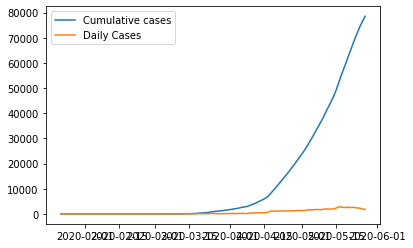

In [102]:
row_KSA = visualiseData(KSA)
print(row_KSA.shape)

In [103]:
test_data_size = 18

train_data = row_KSA[:-test_data_size]
test_data = row_KSA[-test_data_size:]

train_data.shape

(109,)

In [104]:
test_data.shape

(18,)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(np.expand_dims(train_data, axis=1))
train_data = scaler.transform (np.expand_dims(train_data, axis=1))
test_data = scaler.transform (np.expand_dims(test_data, axis=1))

In [0]:
#from sklearn.preprocessing import MinMaxScaler

#def preprocessData(testsize, data):
#  test_data_size = testsize
#  train_data = data[:-test_data_size]
#  test_data = data[-test_data_size:]
#  print("Train data size", train_data.shape)
#  print("Test data size", test_data.shape)
#  return ( train_data, test_data)

In [0]:
#train_data, test_data = preprocessData(18, row_KSA)
#print("Training data is", train_data)
#print("Testing data is",test_data)

In [0]:
seq_length = 16
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [109]:
X_train.shape

torch.Size([92, 16, 1])

In [110]:
X_train[:2]

tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]])

In [111]:
y_train.shape

torch.Size([92, 1])

In [112]:
y_train[:2]

tensor([[0.],
        [0.]])

In [113]:
train_data[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [114]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len = seq_length, 
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model, 
  X_train, 
  y_train, 
  X_test, 
  y_test
)

Epoch 0 train loss: 12.328564643859863 test loss: 1.1299854516983032
Epoch 10 train loss: 8.632104873657227 test loss: 0.7424430847167969
Epoch 20 train loss: 8.268720626831055 test loss: 0.6861187815666199
Epoch 30 train loss: 8.434590339660645 test loss: 0.6964032053947449
Epoch 40 train loss: 7.9051032066345215 test loss: 0.491500586271286
Epoch 50 train loss: 6.8839616775512695 test loss: 0.16295775771141052
Epoch 60 train loss: 6.596199035644531 test loss: 0.10845653712749481
Epoch 70 train loss: 6.4891180992126465 test loss: 0.08390448987483978
Epoch 80 train loss: 6.654494762420654 test loss: 0.0454413928091526
Epoch 90 train loss: 6.651535987854004 test loss: 0.06489076465368271


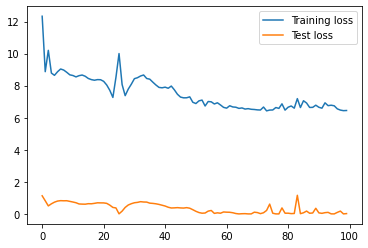

In [115]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.legend();


In [0]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

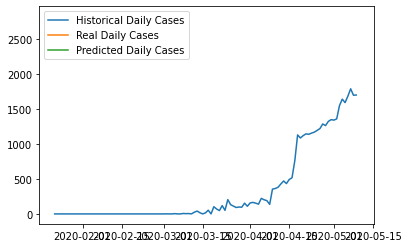

In [118]:
plt.plot(
  row_KSA.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  row_KSA.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  row_KSA.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();

In [119]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(row_KSA, axis=1))

all_data = scaler.transform(np.expand_dims(row_KSA, axis=1))

all_data.shape

(127, 1)

In [120]:
X_all, y_all = create_sequences(all_data, seq_length)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 13.549108505249023
Epoch 10 train loss: 8.607152938842773
Epoch 20 train loss: 8.236860275268555
Epoch 30 train loss: 9.093116760253906
Epoch 40 train loss: 8.538495063781738
Epoch 50 train loss: 8.367353439331055
Epoch 60 train loss: 7.864130020141602
Epoch 70 train loss: 6.956728935241699
Epoch 80 train loss: 6.561793327331543
Epoch 90 train loss: 6.617275714874268


In [0]:
DAYS_TO_PREDICT = 31

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [123]:
row_KSA.index[-1]

Timestamp('2020-05-27 00:00:00')

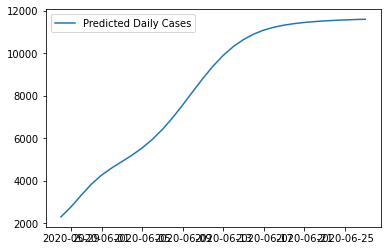

In [124]:
predicted_index = pd.date_range(
  start=row_KSA.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

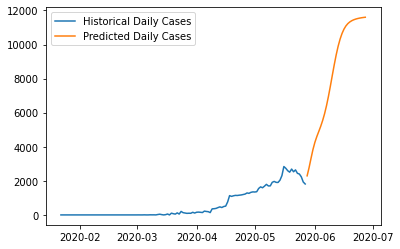

In [125]:
plt.plot(row_KSA, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

# COLOMBIA PREDICTION :)

In [0]:
Colombia = new_df.loc['Colombia']

(127,)


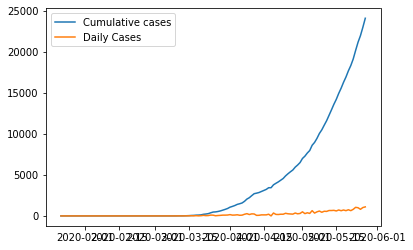

In [127]:
row_Colombia = visualiseData(Colombia)
print(row_Colombia.shape)

In [128]:
test_data_size = 18

train_data = row_Colombia[:-test_data_size]
test_data = row_Colombia[-test_data_size:]

train_data.shape

(109,)

In [129]:
test_data.shape

(18,)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(np.expand_dims(train_data, axis=1))
train_data = scaler.transform (np.expand_dims(train_data, axis=1))
test_data = scaler.transform (np.expand_dims(test_data, axis=1))

In [0]:
#from sklearn.preprocessing import MinMaxScaler

#def preprocessData(testsize, data):
#  test_data_size = testsize
#  train_data = data[:-test_data_size]
#  test_data = data[-test_data_size:]
#  print("Train data size", train_data.shape)
#  print("Test data size", test_data.shape)
#  return ( train_data, test_data)

In [0]:
#train_data, test_data = preprocessData(18, row_KSA)
#print("Training data is", train_data)
#print("Testing data is",test_data)

In [0]:
seq_length = 16
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [134]:
X_train.shape

torch.Size([92, 16, 1])

In [135]:
X_train[:2]

tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]])

In [136]:
y_train.shape

torch.Size([92, 1])

In [137]:
y_train[:2]

tensor([[0.],
        [0.]])

In [138]:
train_data[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [139]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len = seq_length, 
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model, 
  X_train, 
  y_train, 
  X_test, 
  y_test
)

Epoch 0 train loss: 8.91189956665039 test loss: 2.684314489364624
Epoch 10 train loss: 4.660311222076416 test loss: 2.0156760215759277
Epoch 20 train loss: 4.530191421508789 test loss: 1.952885389328003
Epoch 30 train loss: 5.484898090362549 test loss: 1.5859025716781616
Epoch 40 train loss: 4.239633083343506 test loss: 1.6488875150680542
Epoch 50 train loss: 4.042853832244873 test loss: 1.5328553915023804
Epoch 60 train loss: 3.7525272369384766 test loss: 0.702930748462677
Epoch 70 train loss: 3.67490291595459 test loss: 0.8938660025596619
Epoch 80 train loss: 3.771120548248291 test loss: 0.04793180897831917
Epoch 90 train loss: 4.973596572875977 test loss: 2.0601699352264404


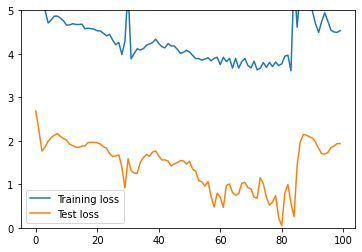

In [140]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 5))
plt.legend();


In [0]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

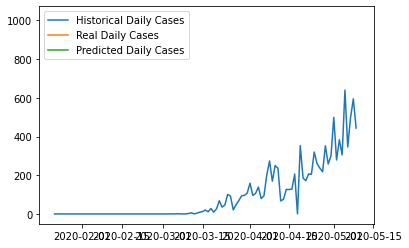

In [143]:
plt.plot(
  row_Colombia.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  row_Colombia.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  row_Colombia.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();

In [144]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(row_Colombia, axis=1))

all_data = scaler.transform(np.expand_dims(row_Colombia, axis=1))

all_data.shape

(127, 1)

In [145]:
X_all, y_all = create_sequences(all_data, seq_length)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 6.632312297821045
Epoch 10 train loss: 4.677976131439209
Epoch 20 train loss: 4.559550762176514
Epoch 30 train loss: 4.1485748291015625
Epoch 40 train loss: 4.305676460266113
Epoch 50 train loss: 3.8038387298583984
Epoch 60 train loss: 3.8648619651794434
Epoch 70 train loss: 3.7487223148345947
Epoch 80 train loss: 3.5200557708740234
Epoch 90 train loss: 4.84060001373291


In [0]:
DAYS_TO_PREDICT = 31

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [148]:
row_Colombia.index[-1]

Timestamp('2020-05-27 00:00:00')

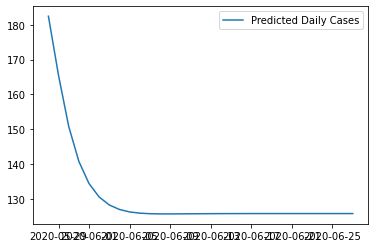

In [149]:
predicted_index = pd.date_range(
  start=row_Colombia.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

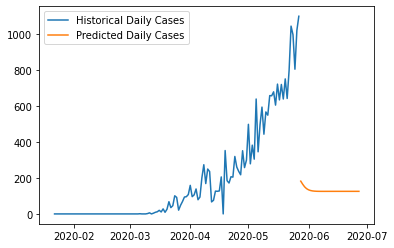

In [150]:
plt.plot(row_Colombia, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

# QATAR PREDICTION :)

In [0]:
Qatar = new_df.loc['Qatar']

(127,)


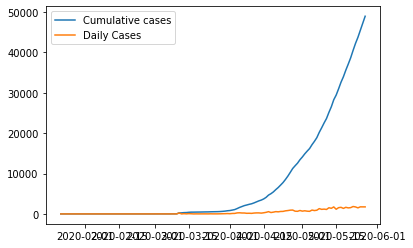

In [152]:
row_Qatar = visualiseData(Qatar)
print(row_Qatar.shape)

In [153]:
test_data_size = 18

train_data = row_Qatar[:-test_data_size]
test_data = row_Qatar[-test_data_size:]

train_data.shape

(109,)

In [154]:
test_data.shape

(18,)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(np.expand_dims(train_data, axis=1))
train_data = scaler.transform (np.expand_dims(train_data, axis=1))
test_data = scaler.transform (np.expand_dims(test_data, axis=1))

In [0]:
seq_length = 16
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [157]:
X_train.shape

torch.Size([92, 16, 1])

In [158]:
X_train[:2]

tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]])

In [159]:
y_train.shape

torch.Size([92, 1])

In [160]:
y_train[:2]

tensor([[0.],
        [0.]])

In [161]:
train_data[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [162]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len = seq_length, 
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model, 
  X_train, 
  y_train, 
  X_test, 
  y_test
)

Epoch 0 train loss: 8.370383262634277 test loss: 1.7854673862457275
Epoch 10 train loss: 5.319568634033203 test loss: 1.3673337697982788
Epoch 20 train loss: 5.243208408355713 test loss: 1.3172354698181152
Epoch 30 train loss: 4.8065690994262695 test loss: 1.1425925493240356
Epoch 40 train loss: 5.255528450012207 test loss: 1.3496142625808716
Epoch 50 train loss: 5.240979194641113 test loss: 1.2376314401626587
Epoch 60 train loss: 5.109777927398682 test loss: 1.2928857803344727
Epoch 70 train loss: 4.451390743255615 test loss: 0.8332038521766663
Epoch 80 train loss: 4.6964111328125 test loss: 1.0660243034362793
Epoch 90 train loss: 6.391717433929443 test loss: 1.547206997871399


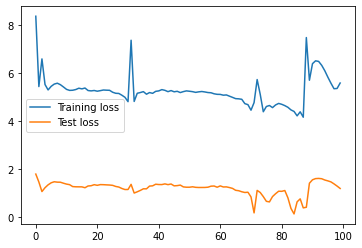

In [163]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
#plt.ylim((0, 5))
plt.legend();


In [0]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

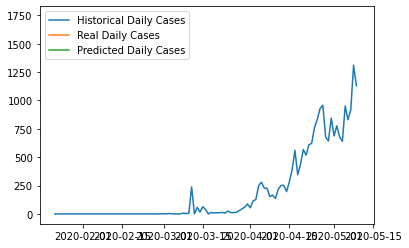

In [166]:
plt.plot(
  row_Qatar.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  row_Qatar.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  row_Qatar.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();

In [167]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(row_Qatar, axis=1))

all_data = scaler.transform(np.expand_dims(row_Qatar, axis=1))

all_data.shape

(127, 1)

In [168]:
X_all, y_all = create_sequences(all_data, seq_length)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 6.865589618682861
Epoch 10 train loss: 5.283928871154785
Epoch 20 train loss: 5.009904861450195
Epoch 30 train loss: 5.321608543395996
Epoch 40 train loss: 5.254637241363525
Epoch 50 train loss: 5.217050552368164
Epoch 60 train loss: 5.085134983062744
Epoch 70 train loss: 4.554068088531494
Epoch 80 train loss: 4.949826240539551
Epoch 90 train loss: 4.2044782638549805


In [0]:
DAYS_TO_PREDICT = 31

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [171]:
row_Qatar.index[-1]

Timestamp('2020-05-27 00:00:00')

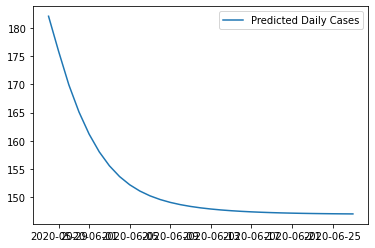

In [172]:
predicted_index = pd.date_range(
  start=row_Qatar.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

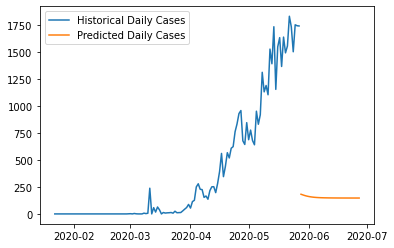

In [173]:
plt.plot(row_Qatar, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

# MEXICO PREDICTION :)

In [0]:
row_Mexico = new_df.loc['Mexico']

(127,)


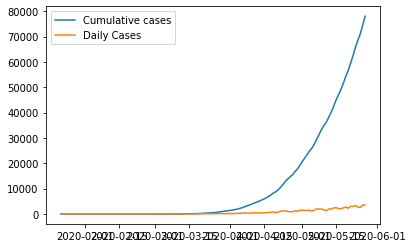

In [175]:
row_Mexico = visualiseData(row_Mexico)
print(row_Mexico.shape)

In [176]:
test_data_size = 18

train_data = row_Mexico[:-test_data_size]
test_data = row_Mexico[-test_data_size:]

train_data.shape

(109,)

In [177]:
test_data.shape

(18,)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(np.expand_dims(train_data, axis=1))
train_data = scaler.transform (np.expand_dims(train_data, axis=1))
test_data = scaler.transform (np.expand_dims(test_data, axis=1))

In [0]:
seq_length = 16
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [180]:
X_train.shape

torch.Size([92, 16, 1])

In [181]:
X_train[:2]

tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]])

In [182]:
y_train.shape

torch.Size([92, 1])

In [183]:
y_train[:2]

tensor([[0.],
        [0.]])

In [184]:
train_data[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [185]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len = seq_length, 
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model, 
  X_train, 
  y_train, 
  X_test, 
  y_test
)

Epoch 0 train loss: 9.05691146850586 test loss: 3.081380844116211
Epoch 10 train loss: 5.913093566894531 test loss: 2.4628448486328125
Epoch 20 train loss: 5.671161651611328 test loss: 2.347654342651367
Epoch 30 train loss: 5.6833295822143555 test loss: 2.3148465156555176
Epoch 40 train loss: 5.4432573318481445 test loss: 2.0759856700897217
Epoch 50 train loss: 5.036052227020264 test loss: 1.8042219877243042
Epoch 60 train loss: 4.878935813903809 test loss: 0.9767473340034485
Epoch 70 train loss: 4.546494483947754 test loss: 0.8606035113334656
Epoch 80 train loss: 6.528645992279053 test loss: 2.5846405029296875
Epoch 90 train loss: 5.944136142730713 test loss: 2.490173816680908


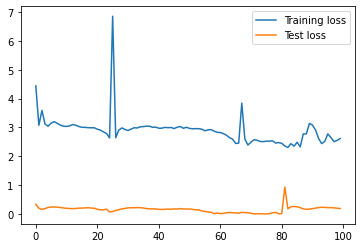

In [243]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.legend();


In [0]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

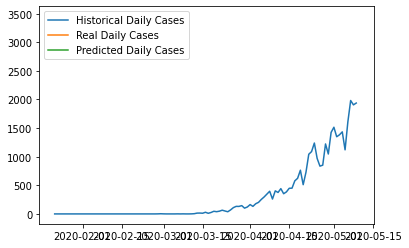

In [189]:
plt.plot(
  row_Mexico.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  row_Mexico.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  row_Mexico.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();

In [190]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(row_Mexico, axis=1))

all_data = scaler.transform(np.expand_dims(row_Mexico, axis=1))

all_data.shape

(127, 1)

In [191]:
X_all, y_all = create_sequences(all_data, seq_length)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 9.66319465637207
Epoch 10 train loss: 5.831014633178711
Epoch 20 train loss: 5.409616947174072
Epoch 30 train loss: 6.564330577850342
Epoch 40 train loss: 5.908531188964844
Epoch 50 train loss: 5.644613742828369
Epoch 60 train loss: 4.985381603240967
Epoch 70 train loss: 4.809961795806885
Epoch 80 train loss: 4.46875524520874
Epoch 90 train loss: 5.0370097160339355


In [0]:
DAYS_TO_PREDICT = 31

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [194]:
row_Mexico.index[-1]

Timestamp('2020-05-27 00:00:00')

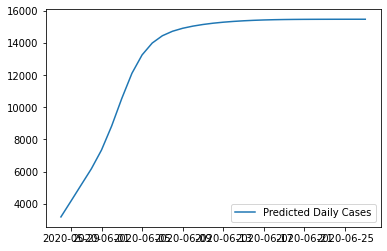

In [195]:
predicted_index = pd.date_range(
  start=row_Mexico.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

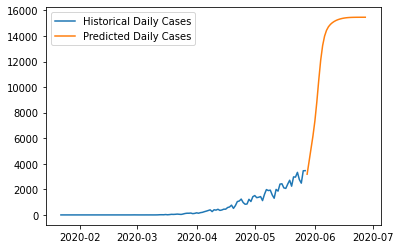

In [196]:
plt.plot(row_Mexico, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

# PERU PREDICTION :)

In [0]:
row_Peru = new_df.loc['Peru']

(127,)


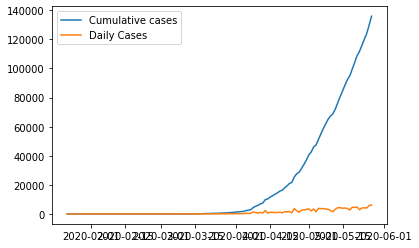

In [198]:
row_Peru = visualiseData(row_Peru)
print(row_KSA.shape)

In [199]:
test_data_size = 18

train_data = row_Peru[:-test_data_size]
test_data = row_Peru[-test_data_size:]

train_data.shape

(109,)

In [200]:
test_data.shape

(18,)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(np.expand_dims(train_data, axis=1))
train_data = scaler.transform (np.expand_dims(train_data, axis=1))
test_data = scaler.transform (np.expand_dims(test_data, axis=1))

In [0]:
seq_length = 16
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [203]:
X_train.shape

torch.Size([92, 16, 1])

In [204]:
X_train[:2]

tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]])

In [205]:
y_train.shape

torch.Size([92, 1])

In [206]:
y_train[:2]

tensor([[0.],
        [0.]])

In [207]:
train_data[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [208]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len = seq_length, 
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model, 
  X_train, 
  y_train, 
  X_test, 
  y_test
)

Epoch 0 train loss: 11.198122024536133 test loss: 2.3640079498291016
Epoch 10 train loss: 7.286178112030029 test loss: 1.7512933015823364
Epoch 20 train loss: 7.01122522354126 test loss: 1.6382540464401245
Epoch 30 train loss: 6.538056373596191 test loss: 1.26787531375885
Epoch 40 train loss: 6.227850437164307 test loss: 0.529028594493866
Epoch 50 train loss: 5.9752960205078125 test loss: 0.04075345769524574
Epoch 60 train loss: 7.011672496795654 test loss: 1.6169381141662598
Epoch 70 train loss: 6.34821891784668 test loss: 0.9442952275276184
Epoch 80 train loss: 6.225564479827881 test loss: 0.4438374936580658
Epoch 90 train loss: 5.977645397186279 test loss: 0.005867078434675932


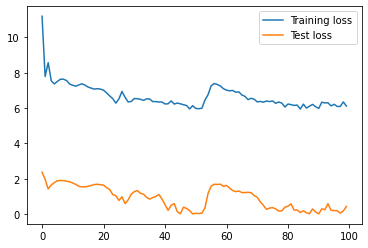

In [209]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
#plt.ylim((0, 5))
plt.legend();


In [0]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

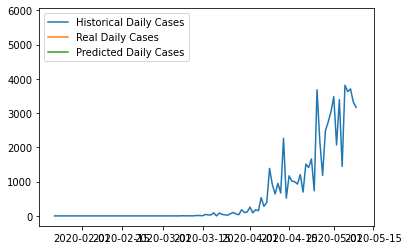

In [212]:
plt.plot(
  row_Peru.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  row_Peru.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  row_Peru.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();

In [213]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(row_Peru, axis=1))

all_data = scaler.transform(np.expand_dims(row_Peru, axis=1))

all_data.shape

(127, 1)

In [214]:
X_all, y_all = create_sequences(all_data, seq_length)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 8.841998100280762
Epoch 10 train loss: 7.204795837402344
Epoch 20 train loss: 7.127147674560547
Epoch 30 train loss: 6.9144744873046875
Epoch 40 train loss: 6.759542942047119
Epoch 50 train loss: 6.4429240226745605
Epoch 60 train loss: 6.156495094299316
Epoch 70 train loss: 7.084104061126709
Epoch 80 train loss: 7.141867160797119
Epoch 90 train loss: 6.721846580505371


In [0]:
DAYS_TO_PREDICT = 31

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [217]:
row_Peru.index[-1]

Timestamp('2020-05-27 00:00:00')

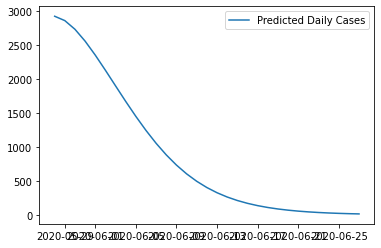

In [218]:
predicted_index = pd.date_range(
  start=row_Peru.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

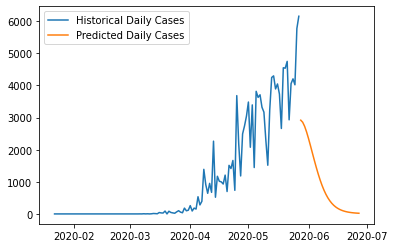

In [219]:
plt.plot(row_Peru, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

# PAKISTAN PREDICTION :)

In [0]:
row_Pak = new_df.loc["Pakistan"]

(127,)


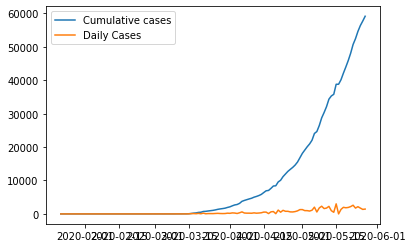

In [245]:
row_Pak = visualiseData(row_Pak)
print(row_Pak.shape)

In [246]:
test_data_size = 18

train_data = row_Pak[:-test_data_size]
test_data = row_Pak[-test_data_size:]

train_data.shape

(109,)

In [247]:
test_data.shape

(18,)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(train_data, axis=1))

train_data = scaler.transform(np.expand_dims(train_data, axis=1))

test_data = scaler.transform(np.expand_dims(test_data, axis=1))

In [0]:
seq_length = 16
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [250]:
X_train.shape

torch.Size([92, 16, 1])

In [251]:
X_train[:2]

tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]])

In [252]:
y_train.shape

torch.Size([92, 1])

In [253]:
y_train[:2]

tensor([[0.],
        [0.]])

In [254]:
train_data[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [255]:
model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len = seq_length, 
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model, 
  X_train, 
  y_train, 
  X_test, 
  y_test
)

Epoch 0 train loss: 5.006631851196289 test loss: 0.36929479241371155
Epoch 10 train loss: 3.0875349044799805 test loss: 0.22773559391498566
Epoch 20 train loss: 3.0190348625183105 test loss: 0.2095516175031662
Epoch 30 train loss: 2.880807399749756 test loss: 0.1462705433368683
Epoch 40 train loss: 2.8275701999664307 test loss: 0.1705646514892578
Epoch 50 train loss: 2.8685617446899414 test loss: 0.16107593476772308
Epoch 60 train loss: 2.712266206741333 test loss: 0.1466195285320282
Epoch 70 train loss: 2.3504321575164795 test loss: 0.0032628129702061415
Epoch 80 train loss: 2.3934812545776367 test loss: 0.026433374732732773
Epoch 90 train loss: 2.2548437118530273 test loss: 0.038629330694675446


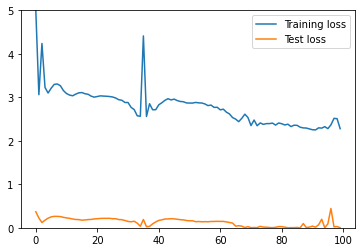

In [256]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 5))
plt.legend();


In [0]:
with torch.no_grad():
  test_seq = X_test[:1]
  preds = []
  for _ in range(len(X_test)):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

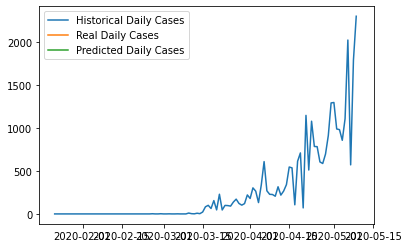

In [259]:
plt.plot(
  row_Pak.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  row_Pak.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  row_Pak.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();

In [260]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(row_Pak, axis=1))

all_data = scaler.transform(np.expand_dims(row_Pak, axis=1))

all_data.shape

(127, 1)

In [261]:
X_all, y_all = create_sequences(all_data, seq_length)

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1, 
  n_hidden=512, 
  seq_len=seq_length, 
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

Epoch 0 train loss: 5.1996636390686035
Epoch 10 train loss: 3.0404765605926514
Epoch 20 train loss: 3.0276544094085693
Epoch 30 train loss: 2.8423259258270264
Epoch 40 train loss: 2.5220205783843994
Epoch 50 train loss: 2.331386089324951
Epoch 60 train loss: 2.4322330951690674
Epoch 70 train loss: 2.5538671016693115
Epoch 80 train loss: 2.3889689445495605
Epoch 90 train loss: 2.250263214111328


In [0]:
DAYS_TO_PREDICT = 31

with torch.no_grad():
  test_seq = X_all[:1]
  preds = []
  for _ in range(DAYS_TO_PREDICT):
    y_test_pred = model(test_seq)
    pred = torch.flatten(y_test_pred).item()
    preds.append(pred)
    new_seq = test_seq.numpy().flatten()
    new_seq = np.append(new_seq, [pred])
    new_seq = new_seq[1:]
    test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

In [0]:
predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

In [264]:
row_Pak.index[-1]

Timestamp('2020-05-27 00:00:00')

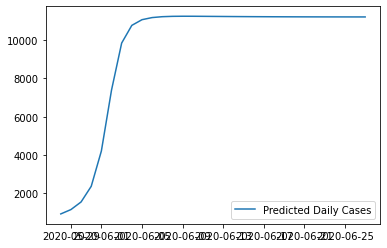

In [265]:
predicted_index = pd.date_range(
  start=row_Pak.index[-1],
  periods=DAYS_TO_PREDICT + 1,
  closed='right'
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

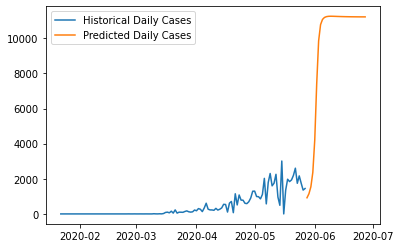

In [266]:
plt.plot(row_Pak, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();